In [ ]:
import ydata_profiling as ydp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('forestCover.csv',na_values='?')


df[['Water_Level', 'Observation_ID']] = df[['Observation_ID', 'Water_Level']]

df['Soil_Type1'] = df['Soil_Type1'].str.lower().map({'positive': 0, 'negative': 1}).astype(int)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

desc = df.describe(include='all').transpose()
print(desc.to_string())


print("\nDataFrame info:")
df.info()


/home/luke/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


                                       count          mean            std           min           25%           50%           75%           max
Elevation                           581012.0  3.270099e+06  309383.131347  2.054195e+06  3.103945e+06  3.310580e+06  3.495115e+06  4.263090e+06
Aspect                              581012.0  1.556568e+02     111.913721  0.000000e+00  5.800000e+01  1.270000e+02  2.600000e+02  3.600000e+02
Facet                               581012.0  3.899193e+02     280.343296  0.000000e+00  1.454909e+02  3.181596e+02  6.525290e+02  9.034134e+02
Slope                               580714.0  1.410374e+01       7.488058  0.000000e+00  9.000000e+00  1.300000e+01  1.800000e+01  6.600000e+01
Inclination                         581012.0 -4.844843e-04       0.577741 -9.999989e-01 -5.005386e-01 -1.061842e-03  5.009318e-01  9.999920e-01
Horizontal_Distance_To_Hydrology    581012.0  5.062486e+03  952330.836884  0.000000e+00  1.080000e+02  2.180000e+02  3.840000e+02  3.742

### DATA QUALITY ISSUES ###

- There remain features with missing values, with missing values indicated by the character symbol ‘?’.
- The Facet feature is correlated with the Aspect feature.
- The Inclination feature contains only noisy values.
- There remain features with outliers.
- There remain features with numeric ranges that differ significantly from one another.
- There are numerical and categorical features.
- Feature Water Level has cardinality of one.
- Feature Observation ID has a unique value for each observation.
- The class distribution remains skew.

## KNN DATA PRE PROCESSING ##

In [7]:
from sklearn.impute import KNNImputer

df_KNN = df.copy()

#Removing Facet
df_KNN = df_KNN.drop(columns=['Facet'])
#Removing Water_Level
df_KNN = df_KNN.drop(columns=['Water_Level'])
#Removing Observation_ID
df_KNN = df_KNN.drop(columns=['Observation_ID'])

#Noise, outliers, are all dependent on K
#Got to deal with skew class distributions

#Impute Missing Values
df_KNN['Slope'] = df_KNN['Slope'].fillna(df_KNN['Slope'].median())

df_KNN.describe()

,Elevation,Aspect,Slope,Inclination,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,5.810120e+05,581012.000000,581012.000000,581012.000000,5.810120e+05,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,3.270099e+06,155.656807,14.103172,-0.000484,5.062486e+03,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,3.093831e+05,111.913721,7.486179,0.577741,9.523308e+05,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,2.054195e+06,0.000000,0.000000,-0.999999,0.000000e+00,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.103945e+06,58.000000,9.000000,-0.500539,1.080000e+02,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.310580e+06,127.000000,13.000000,-0.001062,2.180000e+02,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

Class distribution (counts and %):
             count  percent
Cover_Type                 
1           211840  36.4605
2           283301  48.7599
3            35754   6.1537
4             2747   0.4728
5             9493   1.6339
6            17367   2.9891
7            20510   3.5300

Total samples: 581012, majority/minority ratio: 283301/2747 = 103.13


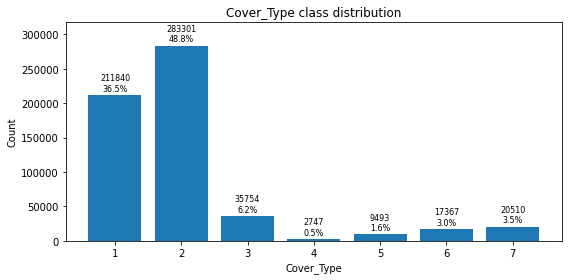

In [ ]:
# show class imbalance for Cover_Type in df_KNN
counts = df_KNN['Cover_Type'].value_counts().sort_index()
pct = counts / counts.sum() * 100
imbalance_df = pd.DataFrame({'count': counts, 'percent': pct.round(4)})
print("Class distribution (counts and %):")
print(imbalance_df)

maj = counts.max()
minc = counts.min()
print(f"\nTotal samples: {counts.sum()}, majority/minority ratio: {maj}/{minc} = {maj/minc:.2f}")
fig, ax = plt.subplots(figsize=(8,4))
bars = ax.bar(counts.index.astype(str), counts.values, align='center')
ax.set_xlabel('Cover_Type')
ax.set_ylabel('Count')
ax.set_title('Cover_Type class distribution')

ymax = counts.max() * 1.12
ax.set_ylim(0, ymax)

for p in ax.patches:
    h = p.get_height()
    ax.annotate(f"{int(h)}\n{h/counts.sum()*100:.1f}%", 
                (p.get_x() + p.get_width() / 2, h + ymax * 0.01),
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Split data into train and test sets (80/20 split)
from sklearn.model_selection import train_test_split

X = df_KNN.drop(columns=['Cover_Type'])
y = df_KNN['Cover_Type']

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Full dataset: {X.shape[0]} samples")
print(f"Training set: {X_train_full.shape[0]} samples ({X_train_full.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]*100:.1f}%)")
print(f"\nTraining set class distribution:")
print(y_train_full.value_counts().sort_index())
print(f"\nTest set class distribution:")
print(y_test.value_counts().sort_index())

Full dataset: 581012 samples
Training set: 406708 samples (70.0%)
Test set: 174304 samples (30.0%)

Training set class distribution:
Cover_Type
1    148288
2    198310
3     25028
4      1923
5      6645
6     12157
7     14357
Name: count, dtype: int64

Test set class distribution:
Cover_Type
1    63552
2    84991
3    10726
4      824
5     2848
6     5210
7     6153
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import os

os.makedirs('tests/knn', exist_ok=True)

X_train = X_train_full
y_train = y_train_full

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results_list = []
metrics_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    scaler = StandardScaler()
    X_fold_train_scaled = scaler.fit_transform(X_fold_train)
    X_fold_val_scaled = scaler.transform(X_fold_val)

    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    knn.fit(X_fold_train_scaled, y_fold_train)
    y_pred = knn.predict(X_fold_val_scaled)

    acc = accuracy_score(y_fold_val, y_pred)
    f1 = f1_score(y_fold_val, y_pred, average='macro')

    metrics_list.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred

    if hasattr(knn, "predict_proba"):
        probs = knn.predict_proba(X_fold_val_scaled)
        for i, cls in enumerate(knn.classes_):
            df_fold[f'prob_{cls}'] = probs[:, i]

    fold_results_path = f'tests/knn/knn_baseline_results_fold_{fold}.csv'
    df_fold.to_csv(fold_results_path, index=True)

    creport = classification_report(y_fold_val, y_pred)
    with open(f'tests/knn/knn_baseline_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    cm = confusion_matrix(y_fold_val, y_pred)
    pd.DataFrame(cm).to_csv(f'tests/knn/knn_baseline_confusion_matrix_fold_{fold}.csv', index=False)

    results_list.append(df_fold)
    print(f"Fold {fold} -- Acc: {acc:.4f}, F1(macro): {f1:.4f} -- saved to tests/knn/")

all_results = pd.concat(results_list)
all_results.to_csv('tests/knn/knn_baseline_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(metrics_list)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/knn/knn_baseline_cv_metrics.csv', index=False)


Fold 1 -- Acc: 0.8633, F1(macro): 0.7814 -- saved to tests/knn/
Fold 2 -- Acc: 0.8657, F1(macro): 0.7861 -- saved to tests/knn/
Fold 2 -- Acc: 0.8657, F1(macro): 0.7861 -- saved to tests/knn/
Fold 3 -- Acc: 0.8640, F1(macro): 0.7745 -- saved to tests/knn/
Fold 3 -- Acc: 0.8640, F1(macro): 0.7745 -- saved to tests/knn/
Fold 4 -- Acc: 0.8629, F1(macro): 0.7716 -- saved to tests/knn/
Fold 4 -- Acc: 0.8629, F1(macro): 0.7716 -- saved to tests/knn/
Fold 5 -- Acc: 0.8653, F1(macro): 0.7818 -- saved to tests/knn/
Fold 5 -- Acc: 0.8653, F1(macro): 0.7818 -- saved to tests/knn/
K-Fold (5) completed. Saved per-fold results and reports to 'tests/knn/'.
Cross-validation metrics:
      fold  accuracy  f1_macro
0      1.0  0.863306  0.781408
1      2.0  0.865654  0.786053
2      3.0  0.863957  0.774465
3      4.0  0.862886  0.771625
4      5.0  0.865345  0.781794
mean   3.0  0.864229  0.779069
K-Fold (5) completed. Saved per-fold results and reports to 'tests/knn/'.
Cross-validation metrics:
      f

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import os

# 5-fold CV KNN with SMOTE applied to each training fold; save outputs to tests/knn/
os.makedirs('tests/knn', exist_ok=True)

X_train = X_train_full
y_train = y_train_full

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results_list = []
metrics_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    scaler = StandardScaler()
    X_fold_train_scaled = scaler.fit_transform(X_fold_train)
    X_fold_val_scaled = scaler.transform(X_fold_val)

    smt = SMOTE(random_state=42)
    X_res, y_res = smt.fit_resample(X_fold_train_scaled, y_fold_train)

    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    knn.fit(X_res, y_res)
    y_pred = knn.predict(X_fold_val_scaled)

    acc = accuracy_score(y_fold_val, y_pred)
    f1 = f1_score(y_fold_val, y_pred, average='macro')

    metrics_list.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred

    if hasattr(knn, "predict_proba"):
        probs = knn.predict_proba(X_fold_val_scaled)
        for i, cls in enumerate(knn.classes_):
            df_fold[f'prob_{cls}'] = probs[:, i]

    fold_results_path = f'tests/knn/knn_smote_results_fold_{fold}.csv'
    df_fold.to_csv(fold_results_path, index=True)

    creport = classification_report(y_fold_val, y_pred)
    with open(f'tests/knn/knn_smote_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    cm = confusion_matrix(y_fold_val, y_pred)
    pd.DataFrame(cm).to_csv(f'tests/knn/knn_smote_confusion_matrix_fold_{fold}.csv', index=False)

    results_list.append(df_fold)
    print(f"Fold {fold} -- Acc: {acc:.4f}, F1(macro): {f1:.4f} -- saved to tests/knn/")

all_results = pd.concat(results_list)
all_results.to_csv('tests/knn/knn_smote_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(metrics_list)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/knn/knn_smote_cv_metrics.csv', index=False)


Fold 1: After SMOTE: X_res.shape = (1110536, 55), y_res distribution:
Cover_Type
1    158648
2    158648
3    158648
4    158648
6    158648
7    158648
5    158648
Name: count, dtype: int64
Fold 1 -- Acc: 0.8423, F1(macro): 0.7518 -- saved to tests/knn/
Fold 1 -- Acc: 0.8423, F1(macro): 0.7518 -- saved to tests/knn/
Fold 2: After SMOTE: X_res.shape = (1110536, 55), y_res distribution:
Cover_Type
2    158648
1    158648
3    158648
4    158648
6    158648
7    158648
5    158648
Name: count, dtype: int64
Fold 2: After SMOTE: X_res.shape = (1110536, 55), y_res distribution:
Cover_Type
2    158648
1    158648
3    158648
4    158648
6    158648
7    158648
5    158648
Name: count, dtype: int64
Fold 2 -- Acc: 0.8448, F1(macro): 0.7616 -- saved to tests/knn/
Fold 2 -- Acc: 0.8448, F1(macro): 0.7616 -- saved to tests/knn/
Fold 3: After SMOTE: X_res.shape = (1110536, 55), y_res distribution:
Cover_Type
2    158648
1    158648
3    158648
6    158648
7    158648
5    158648
4    158648
Name: 

In [ ]:
# K-Fold cross-validated KNN with Tomek Links applied to the training set; save outputs to folder 'tests'
import os
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import TomekLinks as Tomek

os.makedirs('tests/knn', exist_ok=True)

X_train = X_train_full
y_train = y_train_full

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results_list = []
metrics_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    scaler = StandardScaler()
    X_fold_train_scaled = scaler.fit_transform(X_fold_train)
    X_fold_val_scaled = scaler.transform(X_fold_val)

    tomek = Tomek()
    X_res, y_res = tomek.fit_resample(X_fold_train_scaled, y_fold_train)

    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    knn.fit(X_res, y_res)
    y_pred = knn.predict(X_fold_val_scaled)

    acc = accuracy_score(y_fold_val, y_pred)
    f1 = f1_score(y_fold_val, y_pred, average='macro')

    metrics_list.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred

    if hasattr(knn, "predict_proba"):
        probs = knn.predict_proba(X_fold_val_scaled)
        for i, cls in enumerate(knn.classes_):
            df_fold[f'prob_{cls}'] = probs[:, i]

    fold_results_path = f'tests/knn/knn_tomek_results_fold_{fold}.csv'
    df_fold.to_csv(fold_results_path, index=True)

    creport = classification_report(y_fold_val, y_pred)
    with open(f'tests/knn/knn_tomek_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    cm = confusion_matrix(y_fold_val, y_pred)
    pd.DataFrame(cm).to_csv(f'tests/knn/knn_tomek_confusion_matrix_fold_{fold}.csv', index=False)

    results_list.append(df_fold)

all_results = pd.concat(results_list)
all_results.to_csv('tests/knn/knn_tomek_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(metrics_list)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/knn/knn_tomek_cv_metrics.csv', index=False)


Fold 1: After Tomek: X_res.shape = (306946, 55), y_res distribution:
Cover_Type
2    150976
1    111857
3     18652
7     10937
6      8505
5      4480
4      1539
Name: count, dtype: int64
Fold 2: After Tomek: X_res.shape = (306760, 55), y_res distribution:
Cover_Type
2    150938
1    111792
3     18610
7     10954
6      8438
5      4490
4      1538
Name: count, dtype: int64
Fold 2: After Tomek: X_res.shape = (306760, 55), y_res distribution:
Cover_Type
2    150938
1    111792
3     18610
7     10954
6      8438
5      4490
4      1538
Name: count, dtype: int64
Fold 3: After Tomek: X_res.shape = (306752, 55), y_res distribution:
Cover_Type
2    150928
1    111798
3     18589
7     10953
6      8438
5      4508
4      1538
Name: count, dtype: int64
Fold 3: After Tomek: X_res.shape = (306752, 55), y_res distribution:
Cover_Type
2    150928
1    111798
3     18589
7     10953
6      8438
5      4508
4      1538
Name: count, dtype: int64
Fold 4: After Tomek: X_res.shape = (306700, 55), y

In [ ]:
# K-Fold cross-validated KNN with SMOTE using Manhattan distance; save outputs to tests/knn/
import os
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

os.makedirs('tests/knn', exist_ok=True)

X_train = X_train_full
y_train = y_train_full

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results_list = []
metrics_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    scaler = StandardScaler()
    X_fold_train_scaled = scaler.fit_transform(X_fold_train)
    X_fold_val_scaled = scaler.transform(X_fold_val)

    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_fold_train_scaled, y_fold_train)
    
    knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', n_jobs=-1)
    knn.fit(X_res, y_res)
    y_pred = knn.predict(X_fold_val_scaled)

    acc = accuracy_score(y_fold_val, y_pred)
    f1 = f1_score(y_fold_val, y_pred, average='macro')

    metrics_list.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred

    if hasattr(knn, "predict_proba"):
        probs = knn.predict_proba(X_fold_val_scaled)
        for i, cls in enumerate(knn.classes_):
            df_fold[f'prob_{cls}'] = probs[:, i]

    fold_results_path = f'tests/knn/knn_SMOTE_manhattan_results_fold_{fold}.csv'
    df_fold.to_csv(fold_results_path, index=True)

    creport = classification_report(y_fold_val, y_pred)
    with open(f'tests/knn/knn_SMOTE_manhattan_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    cm = confusion_matrix(y_fold_val, y_pred)
    pd.DataFrame(cm).to_csv(f'tests/knn/knn_SMOTE_manhattan_confusion_matrix_fold_{fold}.csv', index=False)

    results_list.append(df_fold)

all_results = pd.concat(results_list)
all_results.to_csv('tests/knn/knn_SMOTE_manhattan_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(metrics_list)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/knn/knn_SMOTE_manhattan_cv_metrics.csv', index=False)


Fold 1: After SMOTE: X_res.shape = (1110536, 55), y_res distribution:
Cover_Type
1    158648
2    158648
3    158648
4    158648
6    158648
7    158648
5    158648
Name: count, dtype: int64
Fold 2: After SMOTE: X_res.shape = (1110536, 55), y_res distribution:
Cover_Type
2    158648
1    158648
3    158648
4    158648
6    158648
7    158648
5    158648
Name: count, dtype: int64
Fold 2: After SMOTE: X_res.shape = (1110536, 55), y_res distribution:
Cover_Type
2    158648
1    158648
3    158648
4    158648
6    158648
7    158648
5    158648
Name: count, dtype: int64
Fold 3: After SMOTE: X_res.shape = (1110536, 55), y_res distribution:
Cover_Type
2    158648
1    158648
3    158648
6    158648
7    158648
5    158648
4    158648
Name: count, dtype: int64
Fold 3: After SMOTE: X_res.shape = (1110536, 55), y_res distribution:
Cover_Type
2    158648
1    158648
3    158648
6    158648
7    158648
5    158648
4    158648
Name: count, dtype: int64
Fold 4: After SMOTE: X_res.shape = (1110536, 

In [ ]:
# K-Fold cross-validated KNN with Tomek Links using Manhattan distance; save outputs to tests/knn/
import os
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import TomekLinks as Tomek

os.makedirs('tests/knn', exist_ok=True)

X_train = X_train_full
y_train = y_train_full

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results_list = []
metrics_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    scaler = StandardScaler()
    X_fold_train_scaled = scaler.fit_transform(X_fold_train)
    X_fold_val_scaled = scaler.transform(X_fold_val)

    tomek = Tomek()
    X_res, y_res = tomek.fit_resample(X_fold_train_scaled, y_fold_train)

    knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', n_jobs=-1)
    knn.fit(X_res, y_res)
    y_pred = knn.predict(X_fold_val_scaled)

    acc = accuracy_score(y_fold_val, y_pred)
    f1 = f1_score(y_fold_val, y_pred, average='macro')

    metrics_list.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred

    if hasattr(knn, "predict_proba"):
        probs = knn.predict_proba(X_fold_val_scaled)
        for i, cls in enumerate(knn.classes_):
            df_fold[f'prob_{cls}'] = probs[:, i]

    fold_results_path = f'tests/knn/knn_tomek_manhattan_results_fold_{fold}.csv'
    df_fold.to_csv(fold_results_path, index=True)

    creport = classification_report(y_fold_val, y_pred)
    with open(f'tests/knn/knn_tomek_manhattan_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    cm = confusion_matrix(y_fold_val, y_pred)
    pd.DataFrame(cm).to_csv(f'tests/knn/knn_tomek_manhattan_confusion_matrix_fold_{fold}.csv', index=False)

    results_list.append(df_fold)

all_results = pd.concat(results_list)
all_results.to_csv('tests/knn/knn_tomek_manhattan_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(metrics_list)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/knn/knn_tomek_manhattan_cv_metrics.csv', index=False)



Fold 1: After Tomek: X_res.shape = (306946, 55), y_res distribution:
Cover_Type
2    150976
1    111857
3     18652
7     10937
6      8505
5      4480
4      1539
Name: count, dtype: int64
Fold 2: After Tomek: X_res.shape = (306760, 55), y_res distribution:
Cover_Type
2    150938
1    111792
3     18610
7     10954
6      8438
5      4490
4      1538
Name: count, dtype: int64
Fold 2: After Tomek: X_res.shape = (306760, 55), y_res distribution:
Cover_Type
2    150938
1    111792
3     18610
7     10954
6      8438
5      4490
4      1538
Name: count, dtype: int64
Fold 3: After Tomek: X_res.shape = (306752, 55), y_res distribution:
Cover_Type
2    150928
1    111798
3     18589
7     10953
6      8438
5      4508
4      1538
Name: count, dtype: int64
Fold 3: After Tomek: X_res.shape = (306752, 55), y_res distribution:
Cover_Type
2    150928
1    111798
3     18589
7     10953
6      8438
5      4508
4      1538
Name: count, dtype: int64
Fold 4: After Tomek: X_res.shape = (306700, 55), y

In [ ]:
# K-Fold cross-validated KNN with Tomek Links using Manhattan distance; save outputs to tests/knn/
import os
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import TomekLinks as Tomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


os.makedirs('tests/knn_grid', exist_ok=True)

X_train = X_train_full
y_train = y_train_full

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results_list = []
metrics_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    scaler = StandardScaler()
    X_fold_train_scaled = scaler.fit_transform(X_fold_train)
    X_fold_val_scaled = scaler.transform(X_fold_val)

    tomek = Tomek()
    X_res, y_res = tomek.fit_resample(X_fold_train_scaled, y_fold_train)

    knn = KNeighborsClassifier(n_neighbors=13, metric='manhattan', n_jobs=-1)
    knn.fit(X_res, y_res)
    y_pred = knn.predict(X_fold_val_scaled)

    acc = accuracy_score(y_fold_val, y_pred)
    f1 = f1_score(y_fold_val, y_pred, average='macro')

    metrics_list.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred

    if hasattr(knn, "predict_proba"):
        probs = knn.predict_proba(X_fold_val_scaled)
        for i, cls in enumerate(knn.classes_):
            df_fold[f'prob_{cls}'] = probs[:, i]

    fold_results_path = f'tests/knn_grid/knn_k13_tomek_manhattan_results_fold_{fold}.csv'
    df_fold.to_csv(fold_results_path, index=True)

    creport = classification_report(y_fold_val, y_pred)
    with open(f'tests/knn_grid/knn_k13_tomek_manhattan_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    cm = confusion_matrix(y_fold_val, y_pred)
    pd.DataFrame(cm).to_csv(f'tests/knn_grid/knn_k13_tomek_manhattan_confusion_matrix_fold_{fold}.csv', index=False)

    results_list.append(df_fold)

all_results = pd.concat(results_list)
all_results.to_csv('tests/knn_grid/knn_k13_tomek_manhattan_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(metrics_list)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/knn_grid/knn_k13_tomek_manhattan_cv_metrics.csv', index=False)


Fold 1: After Tomek: X_res.shape = (306946, 55), y_res distribution:
Cover_Type
2    150976
1    111857
3     18652
7     10937
6      8505
5      4480
4      1539
Name: count, dtype: int64
Fold 2: After Tomek: X_res.shape = (306760, 55), y_res distribution:
Cover_Type
2    150938
1    111792
3     18610
7     10954
6      8438
5      4490
4      1538
Name: count, dtype: int64
Fold 3: After Tomek: X_res.shape = (306752, 55), y_res distribution:
Cover_Type
2    150928
1    111798
3     18589
7     10953
6      8438
5      4508
4      1538
Name: count, dtype: int64
Fold 4: After Tomek: X_res.shape = (306700, 55), y_res distribution:
Cover_Type
2    150909
1    111800
3     18596
7     10945
6      8402
5      4510
4      1538
Name: count, dtype: int64
Fold 5: After Tomek: X_res.shape = (306684, 55), y_res distribution:
Cover_Type
2    150854
1    111714
3     18641
7     10941
6      8512
5      4483
4      1539
Name: count, dtype: int64
K-Fold (5) with Tomek + Manhattan completed. Saved

In [ ]:
# 10-fold cross-validated KNN with k=3, Manhattan distance, and Tomek Links
import os
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import TomekLinks as Tomek
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, 
                           classification_report, confusion_matrix, cohen_kappa_score)
import pandas as pd
import numpy as np

os.makedirs('tests/Final', exist_ok=True)

X_train = X_train_full
y_train = y_train_full

n_splits = 10 
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results_list = []
metrics_list = []

def calculate_specificity_multiclass(y_true, y_pred, classes):
    """Calculate macro-averaged specificity for multiclass classification"""
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    specificities = []
    
    for i, cls in enumerate(classes):
        tn = np.sum(cm) - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])
        fp = np.sum(cm[:, i]) - cm[i, i]
        if tn + fp > 0:
            specificity = tn / (tn + fp)
        else:
            specificity = 0.0
        specificities.append(specificity)
    
    return np.mean(specificities)

print("Starting 10-fold CV for KNN (k=3, Manhattan, Tomek)...")
print("=" * 60)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    scaler = StandardScaler()
    X_fold_train_scaled = scaler.fit_transform(X_fold_train)
    X_fold_val_scaled = scaler.transform(X_fold_val)

    tomek = Tomek()
    X_res, y_res = tomek.fit_resample(X_fold_train_scaled, y_fold_train)
    
    knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', n_jobs=-1)
    knn.fit(X_res, y_res)
    y_pred = knn.predict(X_fold_val_scaled)

    acc = accuracy_score(y_fold_val, y_pred)
    f1_macro = f1_score(y_fold_val, y_pred, average='macro')
    f1_weighted = f1_score(y_fold_val, y_pred, average='weighted')
    precision_macro = precision_score(y_fold_val, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_fold_val, y_pred, average='macro', zero_division=0)
    
    classes = np.unique(np.concatenate([y_fold_val, y_pred]))
    specificity_macro = calculate_specificity_multiclass(y_fold_val, y_pred, classes)
    kappa = cohen_kappa_score(y_fold_val, y_pred)

    metrics_list.append({
        'fold': fold, 
        'accuracy': acc, 
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'specificity_macro': specificity_macro,
        'cohen_kappa': kappa
    })

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred

    if hasattr(knn, "predict_proba"):
        probs = knn.predict_proba(X_fold_val_scaled)
        for i, cls in enumerate(knn.classes_):
            df_fold[f'prob_{cls}'] = probs[:, i]

    fold_results_path = f'tests/Final/knn_k3_tomek_manhattan_10fold_results_fold_{fold}.csv'
    df_fold.to_csv(fold_results_path, index=True)

    creport = classification_report(y_fold_val, y_pred)
    with open(f'tests/Final/knn_k3_tomek_manhattan_10fold_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    cm = confusion_matrix(y_fold_val, y_pred)
    pd.DataFrame(cm).to_csv(f'tests/Final/knn_k3_tomek_manhattan_10fold_confusion_matrix_fold_{fold}.csv', index=False)

    results_list.append(df_fold)
    
    print(f"Fold {fold:2d} | Acc: {acc:.4f} | F1-macro: {f1_macro:.4f} | Precision: {precision_macro:.4f} | Recall: {recall_macro:.4f} | Specificity: {specificity_macro:.4f} | Kappa: {kappa:.4f}")

all_results = pd.concat(results_list)
all_results.to_csv('tests/Final/knn_k3_tomek_manhattan_10fold_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(metrics_list)
mean_metrics = metrics_df.select_dtypes(include=[np.number]).mean()
std_metrics = metrics_df.select_dtypes(include=[np.number]).std()

summary_row = pd.DataFrame([mean_metrics, std_metrics], index=['mean', 'std'])
metrics_summary = pd.concat([metrics_df, summary_row])
metrics_summary.to_csv('tests/Final/knn_k3_tomek_manhattan_10fold_cv_metrics.csv', index=False)

print("=" * 60)
print(f"10-Fold CV completed for KNN (k=3, Manhattan, Tomek)")
print(f"Results saved to 'tests/Final/' directory")
print("\nFinal Cross-validation Summary:")
print("-" * 50)
print(f"Accuracy:     {mean_metrics['accuracy']:.4f} ± {std_metrics['accuracy']:.4f}")
print(f"F1-macro:     {mean_metrics['f1_macro']:.4f} ± {std_metrics['f1_macro']:.4f}")
print(f"F1-weighted:  {mean_metrics['f1_weighted']:.4f} ± {std_metrics['f1_weighted']:.4f}")
print(f"Precision:    {mean_metrics['precision_macro']:.4f} ± {std_metrics['precision_macro']:.4f}")
print(f"Recall:       {mean_metrics['recall_macro']:.4f} ± {std_metrics['recall_macro']:.4f}")
print(f"Specificity:  {mean_metrics['specificity_macro']:.4f} ± {std_metrics['specificity_macro']:.4f}")
print(f"Cohen's Kappa: {mean_metrics['cohen_kappa']:.4f} ± {std_metrics['cohen_kappa']:.4f}")
print("=" * 60)

Starting 10-fold CV for KNN (k=3, Manhattan, Tomek)...
Fold  1 | Acc: 0.8850 | F1-macro: 0.8134 | Precision: 0.8357 | Recall: 0.7943 | Specificity: 0.9729 | Kappa: 0.8143
Fold  1 | Acc: 0.8850 | F1-macro: 0.8134 | Precision: 0.8357 | Recall: 0.7943 | Specificity: 0.9729 | Kappa: 0.8143
Fold  2 | Acc: 0.8819 | F1-macro: 0.8138 | Precision: 0.8334 | Recall: 0.7966 | Specificity: 0.9723 | Kappa: 0.8096
Fold  2 | Acc: 0.8819 | F1-macro: 0.8138 | Precision: 0.8334 | Recall: 0.7966 | Specificity: 0.9723 | Kappa: 0.8096
Fold  3 | Acc: 0.8858 | F1-macro: 0.8261 | Precision: 0.8469 | Recall: 0.8085 | Specificity: 0.9732 | Kappa: 0.8158
Fold  3 | Acc: 0.8858 | F1-macro: 0.8261 | Precision: 0.8469 | Recall: 0.8085 | Specificity: 0.9732 | Kappa: 0.8158
Fold  4 | Acc: 0.8881 | F1-macro: 0.8245 | Precision: 0.8411 | Recall: 0.8102 | Specificity: 0.9736 | Kappa: 0.8194
Fold  4 | Acc: 0.8881 | F1-macro: 0.8245 | Precision: 0.8411 | Recall: 0.8102 | Specificity: 0.9736 | Kappa: 0.8194
Fold  5 | Acc: 0.

### CLASSIFICATION TREES PRE PROCESSING ###

In [2]:
df_CT = df.copy()

#Removing Facet
df_CT = df_CT.drop(columns=['Facet'])
#Removing Water_Level
df_CT = df_CT.drop(columns=['Water_Level'])
#Removing Observation_ID
df_CT = df_CT.drop(columns=['Observation_ID'])

#Noise, outliers, are all dependent on K
#Got to deal with skew class distributions

#Impute Missing Values
df_CT['Slope'] = df_CT['Slope'].fillna(df_CT['Slope'].mean())

#df_CT.describe()


In [ ]:
from sklearn.model_selection import train_test_split

X_CT = df_CT.drop(columns=['Cover_Type'])
y_CT = df_CT['Cover_Type']

X_train_full_CT, X_test_CT, y_train_full_CT, y_test_CT = train_test_split(
    X_CT, y_CT, test_size=0.3, random_state=42, stratify=y_CT
)

print(f"Full CT dataset: {X_CT.shape[0]} samples")
print(f"Training set: {X_train_full_CT.shape[0]} samples ({X_train_full_CT.shape[0]/X_CT.shape[0]*100:.1f}%)")
print(f"Test set: {X_test_CT.shape[0]} samples ({X_test_CT.shape[0]/X_CT.shape[0]*100:.1f}%)")
print(f"\nTraining set class distribution:")
print(y_train_full_CT.value_counts().sort_index())
print(f"\nTest set class distribution:")
print(y_test_CT.value_counts().sort_index())

Full CT dataset: 581012 samples
Training set: 406708 samples (70.0%)
Test set: 174304 samples (30.0%)

Training set class distribution:
Cover_Type
1    148288
2    198310
3     25028
4      1923
5      6645
6     12157
7     14357
Name: count, dtype: int64

Test set class distribution:
Cover_Type
1    63552
2    84991
3    10726
4      824
5     2848
6     5210
7     6153
Name: count, dtype: int64


In [ ]:
# 5-fold cross-validated Decision Tree baseline
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

os.makedirs('tests/CT', exist_ok=True)

X_train = X_train_full_CT
y_train = y_train_full_CT

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_metrics = []
fold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    clf = DecisionTreeClassifier(
        criterion='entropy', 
        ccp_alpha=1.0961774439107219e-05, 
        random_state=42
    )
    clf.fit(X_fold_train, y_fold_train)

    y_pred = clf.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, y_pred)
    f1_macro = f1_score(y_fold_val, y_pred, average='macro')
    f1_weighted = f1_score(y_fold_val, y_pred, average='weighted')
    creport = classification_report(y_fold_val, y_pred)
    cm = confusion_matrix(y_fold_val, y_pred)

    print(f"Fold {fold} -- Accuracy: {acc:.4f}, F1 (macro): {f1_macro:.4f}, F1 (weighted): {f1_weighted:.4f}")
    fold_metrics.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1_macro, 'f1_weighted': f1_weighted})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred
    df_fold.to_csv(f'tests/CT/decision_tree_results_fold_{fold}.csv', index=True)

    with open(f'tests/CT/decision_tree_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    pd.DataFrame(cm).to_csv(f'tests/CT/decision_tree_confusion_matrix_fold_{fold}.csv', index=False)

    fold_results.append(df_fold)

all_results = pd.concat(fold_results)
all_results.to_csv('tests/CT/decision_tree_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(fold_metrics)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/CT/decision_tree_cv_metrics.csv', index=False)



Fold 1 -- Accuracy: 0.9320, F1 (macro): 0.8918, F1 (weighted): 0.9319
Fold 2 -- Accuracy: 0.9332, F1 (macro): 0.8970, F1 (weighted): 0.9331
Fold 3 -- Accuracy: 0.9345, F1 (macro): 0.8969, F1 (weighted): 0.9345
Fold 4 -- Accuracy: 0.9338, F1 (macro): 0.8982, F1 (weighted): 0.9338
Fold 5 -- Accuracy: 0.9328, F1 (macro): 0.8958, F1 (weighted): 0.9328
5-fold CV complete. Saved fold results and metrics to tests/.
Cross-validation metrics:
      fold  accuracy  f1_macro  f1_weighted
0      1.0  0.931994  0.891765     0.931940
1      2.0  0.933155  0.897003     0.933124
2      3.0  0.934500  0.896938     0.934454
3      4.0  0.933844  0.898236     0.933794
4      5.0  0.932800  0.895767     0.932780
mean   3.0  0.933259  0.895942     0.933218


In [ ]:
# 5-fold cross-validated Decision Tree with SMOTE applied on each training fold
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE    
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

os.makedirs('tests/CT', exist_ok=True)

X_train = X_train_full_CT
y_train = y_train_full_CT

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_metrics = []
fold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    smt = SMOTE(random_state=42)
    X_res, y_res = smt.fit_resample(X_fold_train, y_fold_train)

    clf = DecisionTreeClassifier(
        criterion='entropy', 
        ccp_alpha=1.0961774439107219e-05, 
        random_state=42
    )
    clf.fit(X_res, y_res)

    y_pred = clf.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, y_pred)
    f1_macro = f1_score(y_fold_val, y_pred, average='macro')
    f1_weighted = f1_score(y_fold_val, y_pred, average='weighted')
    creport = classification_report(y_fold_val, y_pred)
    cm = confusion_matrix(y_fold_val, y_pred)

    print(f"Fold {fold} -- Accuracy: {acc:.4f}, F1 (macro): {f1_macro:.4f}, F1 (weighted): {f1_weighted:.4f}")
    fold_metrics.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1_macro, 'f1_weighted': f1_weighted})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred
    df_fold.to_csv(f'tests/CT/decision_tree_SMOTE_results_fold_{fold}.csv', index=True)

    with open(f'tests/CT/decision_tree_SMOTE_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    pd.DataFrame(cm).to_csv(f'tests/CT/decision_tree_SMOTE_confusion_matrix_fold_{fold}.csv', index=False)

    fold_results.append(df_fold)

all_results = pd.concat(fold_results)
all_results.to_csv('tests/CT/decision_tree_SMOTE_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(fold_metrics)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/CT/decision_tree_SMOTE_cv_metrics.csv', index=False)



Fold 1: after SMOTE X_res.shape=(1269184, 55), y_res distribution:
Cover_Type
2    181312
7    181312
1    181312
5    181312
3    181312
4    181312
6    181312
Name: count, dtype: int64
Fold 1 -- Accuracy: 0.9089, F1 (macro): 0.8584, F1 (weighted): 0.9095
Fold 2: after SMOTE X_res.shape=(1269184, 55), y_res distribution:
Cover_Type
2    181312
7    181312
1    181312
5    181312
3    181312
4    181312
6    181312
Name: count, dtype: int64
Fold 2 -- Accuracy: 0.9110, F1 (macro): 0.8648, F1 (weighted): 0.9116
Fold 3: after SMOTE X_res.shape=(1269184, 55), y_res distribution:
Cover_Type
2    181312
1    181312
5    181312
7    181312
3    181312
4    181312
6    181312
Name: count, dtype: int64
Fold 3 -- Accuracy: 0.9137, F1 (macro): 0.8703, F1 (weighted): 0.9141
Fold 4: after SMOTE X_res.shape=(1269184, 55), y_res distribution:
Cover_Type
2    181312
7    181312
1    181312
5    181312
3    181312
4    181312
6    181312
Name: count, dtype: int64
Fold 4 -- Accuracy: 0.9095, F1 (macro)

In [ ]:
# 5-fold cross-validated Decision Tree with Tomek Links applied to each training fold; save outputs to tests/
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import TomekLinks as tomek

os.makedirs('tests/CT', exist_ok=True)

X_train = X_train_full_CT
y_train = y_train_full_CT

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_metrics = []
fold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx].copy(), X_train.iloc[val_idx].copy()
    y_fold_train, y_fold_val = y_train.iloc[train_idx].copy(), y_train.iloc[val_idx].copy()

    tomek_sampler = tomek()
    X_res, y_res = tomek_sampler.fit_resample(X_fold_train, y_fold_train)

    clf = DecisionTreeClassifier(
        criterion='entropy', 
        ccp_alpha=1.0961774439107219e-05, 
        random_state=42
    )
    clf.fit(X_res, y_res)

    y_pred = clf.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, y_pred)
    f1_macro = f1_score(y_fold_val, y_pred, average='macro')
    f1_weighted = f1_score(y_fold_val, y_pred, average='weighted')
    creport = classification_report(y_fold_val, y_pred)
    cm = confusion_matrix(y_fold_val, y_pred)

    print(f"Fold {fold} -- Accuracy: {acc:.4f}, F1 (macro): {f1_macro:.4f}, F1 (weighted): {f1_weighted:.4f}")
    fold_metrics.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1_macro, 'f1_weighted': f1_weighted})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred
    df_fold.to_csv(f'tests/CT/decision_tree_tomek_results_fold_{fold}.csv', index=True)

    with open(f'tests/CT/decision_tree_tomek_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    pd.DataFrame(cm).to_csv(f'tests/CT/decision_tree_tomek_confusion_matrix_fold_{fold}.csv', index=False)

    fold_results.append(df_fold)

all_results = pd.concat(fold_results)
all_results.to_csv('tests/CT/decision_tree_tomek_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(fold_metrics)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/CT/decision_tree_tomek_cv_metrics.csv', index=False)


Fold 1: after Tomek X_res.shape=(341628, 55), y_res distribution:
Cover_Type
2    169296
1    125307
3     19841
7     11888
6      8795
5      4742
4      1759
Name: count, dtype: int64
Fold 1 -- Accuracy: 0.9245, F1 (macro): 0.8790, F1 (weighted): 0.9244
Fold 2: after Tomek X_res.shape=(341629, 55), y_res distribution:
Cover_Type
2    169303
1    125396
3     19770
7     11944
6      8726
5      4731
4      1759
Name: count, dtype: int64
Fold 2 -- Accuracy: 0.9267, F1 (macro): 0.8851, F1 (weighted): 0.9266
Fold 3: after Tomek X_res.shape=(341366, 55), y_res distribution:
Cover_Type
2    169221
1    125321
3     19747
7     11884
6      8704
5      4731
4      1758
Name: count, dtype: int64
Fold 3 -- Accuracy: 0.9275, F1 (macro): 0.8864, F1 (weighted): 0.9274
Fold 4: after Tomek X_res.shape=(341609, 55), y_res distribution:
Cover_Type
2    169341
1    125342
3     19804
7     11841
6      8772
5      4751
4      1758
Name: count, dtype: int64
Fold 4 -- Accuracy: 0.9263, F1 (macro): 0.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

X_train = X_train_full_CT
y_train = y_train_full_CT

X_train_prune, X_val_prune, y_train_prune, y_val_prune = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42, stratify=y_train
)

smt = SMOTE(random_state=42)
X_train_prune_res, y_train_prune_res = smt.fit_resample(X_train_prune, y_train_prune)

full_tree = DecisionTreeClassifier(
    criterion='entropy',
    min_samples_split=2,    
    min_samples_leaf=1,     
    max_depth=None,         
    random_state=42
)
full_tree.fit(X_train_prune, y_train_prune)

print(f"Training accuracy: {full_tree.score(X_train_prune, y_train_prune):.4f}")  

path = full_tree.cost_complexity_pruning_path(X_train_prune, y_train_prune)
alphas = path.ccp_alphas

best_score = 0
best_alpha = 0

After SMOTE: X_train_prune_res.shape = (971719, 55), y_train_prune_res distribution:
Cover_Type
1    138817
2    138817
3    138817
7    138817
5    138817
6    138817
4    138817
Name: count, dtype: int64
Training accuracy: 1.0000


In [9]:
unique_alphas = np.unique(alphas)
alphas = unique_alphas
print(f"Unique alphas: {len(unique_alphas)}")

Unique alphas: 7037


In [ ]:
import os
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

os.makedirs('tests', exist_ok=True)

alphas_subset = alphas[::20]

results = []
best_score = -1.0
best_alpha = None

for alpha in alphas_subset:
    print(f"Testing alpha: {alpha}")
    tree = DecisionTreeClassifier(
        criterion='entropy', 
        ccp_alpha=alpha, 
        random_state=42
    )
    tree.fit(X_train_prune, y_train_prune)

    y_val_pred = tree.predict(X_val_prune)
    score = f1_score(y_val_prune, y_val_pred, average='macro')

    try:
        n_nodes = int(tree.tree_.node_count)
    except Exception:
        n_nodes = None
    try:
        depth = int(tree.get_depth())
    except Exception:
        depth = None

    results.append({'alpha': float(alpha), 'f1_macro': float(score), 'n_nodes': n_nodes, 'depth': depth})

    if score > best_score:
        best_score = score
        best_alpha = alpha

import pandas as pd

df_alpha_results = pd.DataFrame(results)
df_alpha_results = df_alpha_results.sort_values('f1_macro', ascending=False).reset_index(drop=True)
df_alpha_results.to_csv('tests/SMOTE_decision_tree_pruning_alphas.csv', index=False)

print(df_alpha_results.head(10))

pruned_tree = DecisionTreeClassifier(
    criterion='entropy', 
    ccp_alpha=best_alpha, 
    random_state=42,
)
pruned_tree.fit(X_train_prune, y_train_prune)



Testing alpha: 0.0
Testing alpha: 8.543190100035498e-06
Testing alpha: 9.477934396234958e-06
Testing alpha: 1.018652238466907e-05
Testing alpha: 1.0837088615439781e-05
Testing alpha: 1.130157422746196e-05
Testing alpha: 1.1691941806324674e-05
Testing alpha: 1.2043295203214815e-05
Testing alpha: 1.242035709635054e-05
Testing alpha: 1.2721142772821291e-05
Testing alpha: 1.3008313179060527e-05
Testing alpha: 1.3233149538734479e-05
Testing alpha: 1.3504311330388642e-05
Testing alpha: 1.3803641077687873e-05
Testing alpha: 1.4020442079078808e-05
Testing alpha: 1.4223709669046553e-05
Testing alpha: 1.4391419565917253e-05
Testing alpha: 1.4547882646608802e-05
Testing alpha: 1.4751684926745293e-05
Testing alpha: 1.493254410544438e-05
Testing alpha: 1.5190777146116696e-05
Testing alpha: 1.5332109885158767e-05
Testing alpha: 1.5462271014065216e-05
Testing alpha: 1.561794547636763e-05
Testing alpha: 1.5786485894141878e-05
Testing alpha: 1.596626302492974e-05
Testing alpha: 1.613092769050886e-05
Te

In [ ]:
# 5-fold cross-validated Decision Tree with Gini criterion (for comparison with entropy)
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

os.makedirs('tests/CT', exist_ok=True)

X_train = X_train_full_CT
y_train = y_train_full_CT

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_metrics = []
fold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    clf = DecisionTreeClassifier(criterion='gini', random_state=42)
    clf.fit(X_fold_train, y_fold_train)

    y_pred = clf.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, y_pred)
    f1_macro = f1_score(y_fold_val, y_pred, average='macro')
    f1_weighted = f1_score(y_fold_val, y_pred, average='weighted')
    creport = classification_report(y_fold_val, y_pred)
    cm = confusion_matrix(y_fold_val, y_pred)

    print(f"Fold {fold} -- Accuracy: {acc:.4f}, F1 (macro): {f1_macro:.4f}, F1 (weighted): {f1_weighted:.4f}")
    fold_metrics.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1_macro, 'f1_weighted': f1_weighted})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred
    df_fold.to_csv(f'tests/CT/decision_tree_gini_base_results_fold_{fold}.csv', index=True)

    with open(f'tests/CT/decision_tree_gini_base_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    pd.DataFrame(cm).to_csv(f'tests/CT/decision_tree_gini_base_confusion_matrix_fold_{fold}.csv', index=False)

    fold_results.append(df_fold)

all_results = pd.concat(fold_results)
all_results.to_csv('tests/CT/decision_tree_gini_base_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(fold_metrics)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/CT/decision_tree_gini_base_cv_metrics.csv', index=False)


Fold 1 -- Accuracy: 0.9288, F1 (macro): 0.8897, F1 (weighted): 0.9289
Fold 2 -- Accuracy: 0.9301, F1 (macro): 0.8864, F1 (weighted): 0.9302
Fold 2 -- Accuracy: 0.9301, F1 (macro): 0.8864, F1 (weighted): 0.9302
Fold 3 -- Accuracy: 0.9299, F1 (macro): 0.8860, F1 (weighted): 0.9298
Fold 3 -- Accuracy: 0.9299, F1 (macro): 0.8860, F1 (weighted): 0.9298
Fold 4 -- Accuracy: 0.9285, F1 (macro): 0.8884, F1 (weighted): 0.9285
Fold 4 -- Accuracy: 0.9285, F1 (macro): 0.8884, F1 (weighted): 0.9285
Fold 5 -- Accuracy: 0.9312, F1 (macro): 0.8891, F1 (weighted): 0.9312
Fold 5 -- Accuracy: 0.9312, F1 (macro): 0.8891, F1 (weighted): 0.9312
5-fold CV with Gini criterion complete. Saved fold results and metrics to tests/.
Cross-validation metrics:
      fold  accuracy  f1_macro  f1_weighted
0      1.0  0.928842  0.889670     0.928851
1      2.0  0.930122  0.886444     0.930152
2      3.0  0.929875  0.886022     0.929844
3      4.0  0.928487  0.888357     0.928487
4      5.0  0.931165  0.889093     0.93115

In [ ]:
# 5-fold cross-validated Decision Tree with SMOTE using Gini criterion (for comparison with entropy)
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

os.makedirs('tests/CT', exist_ok=True)

X_train = X_train_full_CT
y_train = y_train_full_CT

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_metrics = []
fold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    smt = SMOTE(random_state=42)
    X_res, y_res = smt.fit_resample(X_fold_train, y_fold_train)
    print(f"Fold {fold}: after SMOTE X_res.shape={X_res.shape}, y_res distribution:\n{pd.Series(y_res).value_counts()}")

    clf = DecisionTreeClassifier(criterion='gini', random_state=42)
    clf.fit(X_res, y_res)

    y_pred = clf.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, y_pred)
    f1_macro = f1_score(y_fold_val, y_pred, average='macro')
    f1_weighted = f1_score(y_fold_val, y_pred, average='weighted')
    creport = classification_report(y_fold_val, y_pred)
    cm = confusion_matrix(y_fold_val, y_pred)

    print(f"Fold {fold} -- Accuracy: {acc:.4f}, F1 (macro): {f1_macro:.4f}, F1 (weighted): {f1_weighted:.4f}")
    fold_metrics.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1_macro, 'f1_weighted': f1_weighted})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred
    df_fold.to_csv(f'tests/CT/decision_tree_gini_smote_results_fold_{fold}.csv', index=True)

    with open(f'tests/CT/decision_tree_gini_smote_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    pd.DataFrame(cm).to_csv(f'tests/CT/decision_tree_gini_smote_confusion_matrix_fold_{fold}.csv', index=False)

    fold_results.append(df_fold)

all_results = pd.concat(fold_results)
all_results.to_csv('tests/CT/decision_tree_gini_smote_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(fold_metrics)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/CT/decision_tree_gini_smote_cv_metrics.csv', index=False)


Fold 1: after SMOTE X_res.shape=(1269184, 55), y_res distribution:
Cover_Type
2    181312
7    181312
1    181312
5    181312
3    181312
4    181312
6    181312
Name: count, dtype: int64
Fold 1 -- Accuracy: 0.9236, F1 (macro): 0.8705, F1 (weighted): 0.9240
Fold 1 -- Accuracy: 0.9236, F1 (macro): 0.8705, F1 (weighted): 0.9240
Fold 2: after SMOTE X_res.shape=(1269184, 55), y_res distribution:
Cover_Type
2    181312
7    181312
1    181312
5    181312
3    181312
4    181312
6    181312
Name: count, dtype: int64
Fold 2: after SMOTE X_res.shape=(1269184, 55), y_res distribution:
Cover_Type
2    181312
7    181312
1    181312
5    181312
3    181312
4    181312
6    181312
Name: count, dtype: int64
Fold 2 -- Accuracy: 0.9241, F1 (macro): 0.8711, F1 (weighted): 0.9244
Fold 2 -- Accuracy: 0.9241, F1 (macro): 0.8711, F1 (weighted): 0.9244
Fold 3: after SMOTE X_res.shape=(1269184, 55), y_res distribution:
Cover_Type
2    181312
1    181312
5    181312
7    181312
3    181312
4    181312
6    1

In [ ]:
# 5-fold cross-validated Decision Tree with Tomek using Gini criterion (for comparison with entropy)
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import TomekLinks as Tomek
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

os.makedirs('tests/CT', exist_ok=True)

X_train = X_train_full_CT
y_train = y_train_full_CT

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_metrics = []
fold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    smt = Tomek()
    X_res, y_res = smt.fit_resample(X_fold_train, y_fold_train)
    print(f"Fold {fold}: after Tomek X_res.shape={X_res.shape}, y_res distribution:\n{pd.Series(y_res).value_counts()}")

    clf = DecisionTreeClassifier(criterion='gini', random_state=42)
    clf.fit(X_res, y_res)

    y_pred = clf.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, y_pred)
    f1_macro = f1_score(y_fold_val, y_pred, average='macro')
    f1_weighted = f1_score(y_fold_val, y_pred, average='weighted')
    creport = classification_report(y_fold_val, y_pred)
    cm = confusion_matrix(y_fold_val, y_pred)

    print(f"Fold {fold} -- Accuracy: {acc:.4f}, F1 (macro): {f1_macro:.4f}, F1 (weighted): {f1_weighted:.4f}")
    fold_metrics.append({'fold': fold, 'accuracy': acc, 'f1_macro': f1_macro, 'f1_weighted': f1_weighted})

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred
    df_fold.to_csv(f'tests/CT/decision_tree_gini_tomek_results_fold_{fold}.csv', index=True)

    with open(f'tests/CT/decision_tree_gini_tomek_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    pd.DataFrame(cm).to_csv(f'tests/CT/decision_tree_gini_tomek_confusion_matrix_fold_{fold}.csv', index=False)

    fold_results.append(df_fold)

all_results = pd.concat(fold_results)
all_results.to_csv('tests/CT/decision_tree_gini_tomek_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(fold_metrics)
metrics_df.loc['mean'] = metrics_df.mean(numeric_only=True)
metrics_df.to_csv('tests/CT/decision_tree_gini_tomek_cv_metrics.csv', index=False)

Fold 1: after Tomek X_res.shape=(341628, 55), y_res distribution:
Cover_Type
2    169296
1    125307
3     19841
7     11888
6      8795
5      4742
4      1759
Name: count, dtype: int64
Fold 1 -- Accuracy: 0.9238, F1 (macro): 0.8711, F1 (weighted): 0.9237
Fold 1 -- Accuracy: 0.9238, F1 (macro): 0.8711, F1 (weighted): 0.9237
Fold 2: after Tomek X_res.shape=(341629, 55), y_res distribution:
Cover_Type
2    169303
1    125396
3     19770
7     11944
6      8726
5      4731
4      1759
Name: count, dtype: int64
Fold 2: after Tomek X_res.shape=(341629, 55), y_res distribution:
Cover_Type
2    169303
1    125396
3     19770
7     11944
6      8726
5      4731
4      1759
Name: count, dtype: int64
Fold 2 -- Accuracy: 0.9219, F1 (macro): 0.8782, F1 (weighted): 0.9218
Fold 2 -- Accuracy: 0.9219, F1 (macro): 0.8782, F1 (weighted): 0.9218
Fold 3: after Tomek X_res.shape=(341366, 55), y_res distribution:
Cover_Type
2    169221
1    125321
3     19747
7     11884
6      8704
5      4731
4      175

In [ ]:
# 10-fold cross-validated Decision Tree with Tomek Links (similar to the KNN example)
import os
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import TomekLinks as Tomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, 
                             classification_report, confusion_matrix, cohen_kappa_score)
import numpy as np
import pandas as pd

os.makedirs('tests/CT/Final', exist_ok=True)

X_train = X_train_full_CT
y_train = y_train_full_CT

n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results_list = []
metrics_list = []

def calculate_specificity_multiclass(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    specificities = []
    for i, cls in enumerate(classes):
        tn = np.sum(cm) - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificities.append(tn / (tn + fp) if (tn + fp) > 0 else 0.0)
    return np.mean(specificities)

ccp_alpha_val = globals().get('best_alpha', 1.0961774439107219e-05)

print("Starting 10-fold CV for Decision Tree (Tomek + entropy)...")
print("=" * 60)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    tomek = Tomek()
    X_res, y_res = tomek.fit_resample(X_fold_train, y_fold_train)
    print(f"Fold {fold}: After Tomek: X_res.shape = {X_res.shape}, y_res distribution:\n{pd.Series(y_res).value_counts()}")

    clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alpha_val, random_state=42)
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_fold_val)

    acc = accuracy_score(y_fold_val, y_pred)
    f1_macro = f1_score(y_fold_val, y_pred, average='macro')
    f1_weighted = f1_score(y_fold_val, y_pred, average='weighted')
    precision_macro = precision_score(y_fold_val, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_fold_val, y_pred, average='macro', zero_division=0)
    classes = np.unique(np.concatenate([y_fold_val, y_pred]))
    specificity_macro = calculate_specificity_multiclass(y_fold_val, y_pred, classes)
    kappa = cohen_kappa_score(y_fold_val, y_pred)

    metrics_list.append({
        'fold': fold,
        'accuracy': acc,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'specificity_macro': specificity_macro,
        'cohen_kappa': kappa
    })

    df_fold = X_fold_val.copy()
    df_fold['y_true'] = y_fold_val
    df_fold['y_pred'] = y_pred

    if hasattr(clf, "predict_proba"):
        probs = clf.predict_proba(X_fold_val)
        for i, cls in enumerate(clf.classes_):
            df_fold[f'prob_{cls}'] = probs[:, i]

    fold_results_path = f'tests/CT/Final/decision_tree_tomek_entropy_10fold_results_fold_{fold}.csv'
    df_fold.to_csv(fold_results_path, index=True)

    creport = classification_report(y_fold_val, y_pred)
    with open(f'tests/CT/Final/decision_tree_tomek_entropy_10fold_classification_report_fold_{fold}.txt', 'w') as f:
        f.write(creport)
    cm = confusion_matrix(y_fold_val, y_pred)
    pd.DataFrame(cm).to_csv(f'tests/CT/Final/decision_tree_tomek_entropy_10fold_confusion_matrix_fold_{fold}.csv', index=False)

    results_list.append(df_fold)

    print(f"Fold {fold:2d} | Acc: {acc:.4f} | F1-macro: {f1_macro:.4f} | Precision: {precision_macro:.4f} | Recall: {recall_macro:.4f} | Specificity: {specificity_macro:.4f} | Kappa: {kappa:.4f}")

all_results = pd.concat(results_list)
all_results.to_csv('tests/CT/Final/decision_tree_tomek_entropy_10fold_results_all_folds.csv', index=True)

metrics_df = pd.DataFrame(metrics_list)
mean_metrics = metrics_df.select_dtypes(include=[np.number]).mean()
std_metrics = metrics_df.select_dtypes(include=[np.number]).std()

summary_row = pd.DataFrame([mean_metrics, std_metrics], index=['mean', 'std'])
metrics_summary = pd.concat([metrics_df, summary_row])
metrics_summary.to_csv('tests/CT/Final/decision_tree_tomek_entropy_10fold_cv_metrics.csv', index=False)

print("=" * 60)
print("10-Fold CV completed for Decision Tree (Tomek + entropy)")
print("Results saved to 'tests/CT/Final/'")
print("\nFinal Cross-validation Summary:")
print("-" * 50)
print(f"Accuracy:     {mean_metrics['accuracy']:.4f} ± {std_metrics['accuracy']:.4f}")
print(f"F1-macro:     {mean_metrics['f1_macro']:.4f} ± {std_metrics['f1_macro']:.4f}")
print(f"F1-weighted:  {mean_metrics['f1_weighted']:.4f} ± {std_metrics['f1_weighted']:.4f}")
print(f"Precision:    {mean_metrics['precision_macro']:.4f} ± {std_metrics['precision_macro']:.4f}")
print(f"Recall:       {mean_metrics['recall_macro']:.4f} ± {std_metrics['recall_macro']:.4f}")
print(f"Specificity:  {mean_metrics['specificity_macro']:.4f} ± {std_metrics['specificity_macro']:.4f}")
print(f"Cohen's Kappa: {mean_metrics['cohen_kappa']:.4f} ± {std_metrics['cohen_kappa']:.4f}")
print("=" * 60)


Starting 10-fold CV for Decision Tree (Tomek + entropy)...
Fold 1: After Tomek: X_res.shape = (335656, 55), y_res distribution:
Cover_Type
2    166413
1    123131
3     19451
7     11687
6      8570
5      4673
4      1731
Name: count, dtype: int64
Fold  1 | Acc: 0.9255 | F1-macro: 0.8844 | Precision: 0.8928 | Recall: 0.8764 | Specificity: 0.9827 | Kappa: 0.8802
Fold 2: After Tomek: X_res.shape = (335722, 55), y_res distribution:
Cover_Type
2    166434
1    123174
3     19442
7     11713
6      8572
5      4656
4      1731
Name: count, dtype: int64
Fold  2 | Acc: 0.9260 | F1-macro: 0.8777 | Precision: 0.8797 | Recall: 0.8760 | Specificity: 0.9829 | Kappa: 0.8811
Fold 3: After Tomek: X_res.shape = (335603, 55), y_res distribution:
Cover_Type
2    166404
1    123136
3     19423
7     11703
6      8543
5      4663
4      1731
Name: count, dtype: int64
Fold  3 | Acc: 0.9248 | F1-macro: 0.8798 | Precision: 0.8834 | Recall: 0.8768 | Specificity: 0.9826 | Kappa: 0.8791
Fold 4: After Tomek: X_

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel

knn_path = 'tests/Final/knn_k3_tomek_manhattan_10fold_cv_metrics.csv'
dt_path  = 'tests/CT/Final/decision_tree_tomek_entropy_10fold_cv_metrics.csv'

def load_cv_metrics(path, n_splits=10):
    if not os.path.exists(path):
        raise FileNotFoundError(path)
    df = pd.read_csv(path)

    fold_col = 'fold' if 'fold' in df.columns else df.columns[0]
    df['fold_num'] = pd.to_numeric(df[fold_col], errors='coerce')

    df = df[df['fold_num'].apply(lambda x: float(x).is_integer())]
    df = df[df['fold_num'].between(1, n_splits, inclusive="both")]

    df = df.sort_values('fold_num').reset_index(drop=True)
    return df


df_knn = load_cv_metrics(knn_path)
df_dt  = load_cv_metrics(dt_path)

metrics = ['accuracy', 'f1_macro']  

results = {}
for m in metrics:
    a = df_knn[m].to_numpy(dtype=float)
    b = df_dt[m].to_numpy(dtype=float)
    if a.shape != b.shape:
        raise ValueError(f"Metric arrays for '{m}' have different shapes: {a.shape} vs {b.shape}")
    tstat, pval = ttest_rel(a, b)
    mean_a, mean_b = a.mean(), b.mean()
    diff = a - b
    md = diff.mean()
    sd_diff = diff.std(ddof=1)
    cohen_d = md / sd_diff if sd_diff > 0 else np.nan
    results[m] = {
        'knn_mean': mean_a,
        'dt_mean': mean_b,
        'mean_diff (knn - dt)': md,
        't_stat': tstat,
        'p_value': pval,
        "cohen_d": cohen_d
    }

for metric, r in results.items():
    print(f"Metric: {metric}")
    print(f"  KNN mean = {r['knn_mean']:.6f}, DT mean = {r['dt_mean']:.6f}")
    print(f"  Mean diff (KNN - DT) = {r['mean_diff (knn - dt)']:.6f}")
    print(f"  Paired t-stat = {r['t_stat']:.4f}, p-value = {r['p_value']:.4e}")
    print(f"  Cohen's d (paired) = {r['cohen_d']:.4f}")
    print("-" * 60)

Metric: accuracy
  KNN mean = 0.884541, DT mean = 0.925903
  Mean diff (KNN - DT) = -0.041361
  Paired t-stat = -82.6368, p-value = 2.8182e-14
  Cohen's d (paired) = -26.1320
------------------------------------------------------------
Metric: f1_macro
  KNN mean = 0.815891, DT mean = 0.882839
  Mean diff (KNN - DT) = -0.066948
  Paired t-stat = -29.7741, p-value = 2.6569e-10
  Cohen's d (paired) = -9.4154
------------------------------------------------------------
